In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xlrd
from mpmath import mpf, mp

In [2]:
mp.dps = 100

In [3]:
path = "dataset_NB.txt"

In [4]:
data = []
with open(path) as f:
    data.append(f.readlines())

In [5]:
data1 = data[0]
len(data1)

1000

In [6]:
punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''

In [7]:
def token(data):
    
    data_n = []
    
    l = len(data)
    
    for i in range(l):
        lis = []
        string = data1[i].split()
        yi = [string[-1]]
        slen = len(string)
        for j in range(slen - 1):
            s1 = ""
            if string[j] not in punc:
                for e in string[j]:
                    if e not in punc:
                        s1 = s1 + e
            lis.append(s1)
                                              
        data_n.append([lis, yi])
        
    data_np = np.array(data_n)
        
    return data_np

In [8]:
data_np = token(data1)

In [9]:
data_np[0]

array([list(['So', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'US', 'unless', 'I', 'go', 'by', 'a', 'converter']),
       list(['0'])], dtype=object)

In [10]:
data_np.shape

(1000, 2)

In [11]:
def dict_w(data_tr, alpha):
    
    dic_w = {}
    ld = len(data_tr)
    N = 0
    Y = 0
    No = 0
    spam = 0
    nspam = 0
    for i in range(ld):
        data = data_tr[i]
        for a in data:
            yl = a[1][0]
            if yl == "0":
                nspam = nspam + 1
            elif yl == "1":
                spam = spam + 1
            wl = a[0]
            for word in wl:
                N = N + 1
                if word not in dic_w.keys():
                    if yl == "0":
                        dic_w[word] = [1, 0, 1]
                    elif yl == "1":
                        dic_w[word] = [0, 1, 1]
                else:
                    if yl == "0":
                        dic_w[word][0] = dic_w[word][0] + 1
                    elif yl == "1":
                        dic_w[word][1] = dic_w[word][1] + 1
                    dic_w[word][2] = dic_w[word][2] + 1
    
                    
    for word in dic_w.keys():
        No = No + dic_w[word][0]
        Y = Y + dic_w[word][1]
        
    for word in dic_w.keys():
        dic_w[word][0] = (dic_w[word][0] + alpha)/(No + len(dic_w)*alpha)
        dic_w[word][1] = (dic_w[word][1] + alpha)/(Y + len(dic_w)*alpha)
        dic_w[word][2] = (dic_w[word][2] + alpha)/(N + len(dic_w)*alpha)
    
    lisp = [dic_w, spam, nspam]

    return lisp

In [12]:
def k_val_fit(data_trial, k, alpha):

    np.random.shuffle(data_trial)
    data_g = np.array_split(data_trial, k)
    nb_accuracy = {}
    nbtr_accuracy = {}
    for i in range(k):
        data_tes = data_g[i]
        data_tr = []
        lenm = 0
        for j in range(k):
            if j!=i:
                data_tr.append(data_g[j])
                lenm = lenm + len(data_g[j])
        lisp = dict_w(data_tr, alpha)
        dicti_w = lisp[0]
        spam = lisp[1]
        nspam = lisp[2]
        P0 = mpf(nspam)/(lenm)
        P1 = mpf(spam)/(lenm)
        count = 0
            
        for ar in data_tes:   
            ytrue = float(ar[1][0])
            wlt = ar[0]
            Pw0 = 1
            Pw1 = 1
            Pw = 1
            for word in wlt:
                if word in dicti_w.keys():
                    lisw = dicti_w[word]
                    Pw0 = Pw0*mpf(lisw[0])
                    Pw1 = Pw1*mpf(lisw[1])
                    Pw = Pw*mpf(lisw[2])
                else:
                    Pw0 = Pw0*(alpha/(alpha*len(dicti_w)))
                    Pw0 = Pw1*(alpha/(alpha*len(dicti_w)))
                    Pw = Pw*(alpha/(alpha*len(dicti_w)))
                    
            Py0 = (mpf(Pw0)*mpf(P0))/mpf(Pw)
            Py1 = (mpf(Pw1)*mpf(P1))/mpf(Pw)
            py0 = mpf(Py0)/(mpf(Py0) + mpf(Py1))
            py1 = mpf(Py1)/(mpf(Py0) + mpf(Py1))
            
            if py0>py1:
                ypred = float(0)
            elif py1>=py0:
                ypred = float(1)
            if ypred == ytrue:
                count = count + 1

        accuracy = (count/len(data_tes))*100
        stringi = "test" + str(i)
        nb_accuracy[stringi] = accuracy
    
    return nb_accuracy

In [13]:
alphas = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
accuracies_alpha = []
accuracies = []
for alpha in alphas:
    maxx = 0.0
    try:
        nb_accu = k_val_fit(data_np, 7, alpha)
        for key in nb_accu.keys():
            if nb_accu[key]>maxx:
                maxx = nb_accu[key]
        accuracies_alpha.append([key, alpha, maxx])
        accuracies.append(maxx)
    except ZeroDivisionError as e:
        accuracies_alpha.append([alpha, maxx])
        accuracies.append(maxx)
        print("Division by zero")

Division by zero


In [14]:
for i in range(len(accuracies_alpha)):
    print(accuracies_alpha[i])

[0.0, 0.0]
['test6', 0.1, 66.90140845070422]
['test6', 0.2, 67.13286713286713]
['test6', 0.3, 67.83216783216784]
['test6', 0.4, 72.53521126760563]
['test6', 0.5, 64.33566433566433]
['test6', 0.6, 64.7887323943662]
['test6', 0.7, 66.43356643356644]
['test6', 0.8, 65.03496503496503]
['test6', 0.9, 66.43356643356644]
['test6', 1.0, 64.33566433566433]


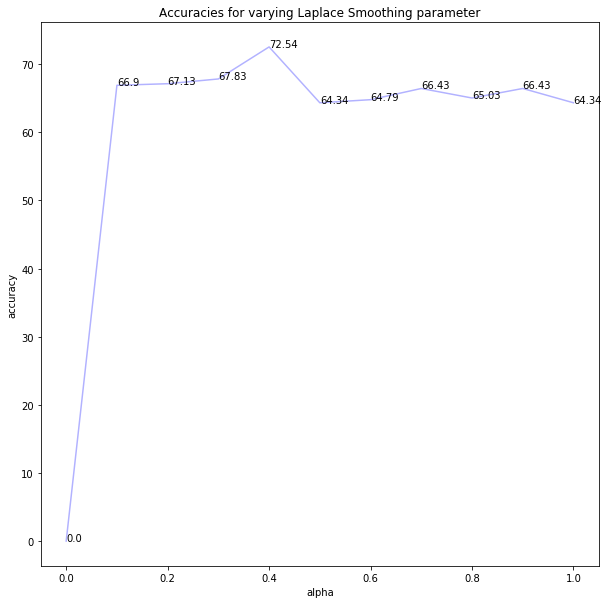

In [15]:
fig = plt.figure(figsize = (10, 10))
plt.plot(alphas, accuracies, c = "b", alpha = 0.3)
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("Accuracies for varying Laplace Smoothing parameter")
for i, accu in enumerate(accuracies):
    plt.annotate(round(accu, 2), (alphas[i], accuracies[i]))
plt.show()